# Desarrollo Tarea 1 - Introducción a la Bioinformática
***
### Nombres de los integrantes:
    - Iñaki Oyarzun M.
    - Vicente Alvarez A.


***
Import de variables previas




In [ ]:
import numpy 
import matplotlib.pyplot as plt

### Pregunta 1
***
A partir de la siguiente combinación entre los nombres de los integrantes, se llega a la siguiente consulta a realizar como proteína:

`VINAKIALVARESVN` (Vinaki Alvarezun)

A partir de la siguiente configuración se procede a realizar la ejecución del algoritmo:

![Parámetros del algoritmo](/content/ConfigAlgoritmo.PNG)

Obteniendo los siguientes resultados:

![Resultados de BLAST](/content/ResultadosBLAST.PNG)

a) De ello, seleccionando la primera proteína hallada se procede a generar los dos dot plots asociados, tomando en cuenta la misma distancia del largo de la query a al derecha y a la izquierda, obteniendo lo siguiente:

* match: ikakialvareknlvpfsvn
* match + extension derecha e izquierda: stpnssgtlltyildddgr**ikakialvareknlvpfsvn**alenvkstsytyrlpsvet




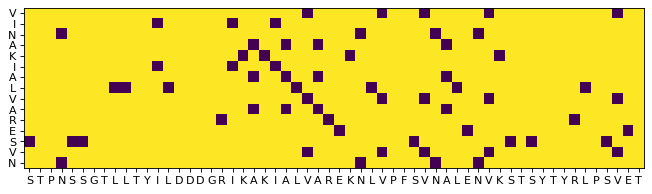

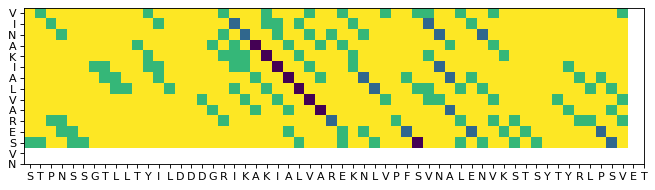

In [ ]:
# Función que genera un dotplot a partir de dos secuencias.
# Obtenido de StackOverflow, realizado por John Coleman y complementado por Nick
# https://stackoverflow.com/questions/40822400/how-to-create-a-dotplot-of-two-dna-sequence-in-python

seq1 = "VINAKIALVARESVN"
seq2 = ("stpnssgtlltyildddgrikakialvareknlvpfsvnalenvkstsytyrlpsvet").upper()
def delta(x,y):
    return 0 if x == y else 1
def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))
def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]
def generateDotplot(seqx, seqy, k):
    plt.figure(figsize=(10,15), dpi=80)
    dotplot=plt.imshow(numpy.array(makeMatrix(seqx,seqy,k)))
    xt=plt.xticks(numpy.arange(len(list(seqy))),list(seqy))
    yt=plt.yticks(numpy.arange(len(list(seqx))),list(seqx))
    plt.show()

generateDotplot(seq1, seq2,1)
generateDotplot(seq1, seq2,3)




***
b) El alineamiento que entregó BLAST fue el siguiente:

![Alineamiento BLAST](/content/alineamiento.PNG)

De lo anterior se muestra que la diferencia entre la query realizada para BLAST y el segmento de la proteína se encuentra en un solo gap de tamaño 6 y un reemplazo de letra (Segunda letra K por una N)

***
c) Es una pyruvyl-transferasa, una enzima envuelta en biosintesis de polimeros asociados a peptidoglycanos, perteneciente a una familia de proteinas, como lo indica el nombre. Esta información se apoya en el siguiente [link](https://www.ebi.ac.uk/interpro/entry/InterPro/IPR007345/).

Su estructura se puede observar en el modelo generado en este [sitio](https://www.uniprot.org/uniprotkb/A0A060I400/entry).

***
d) Pertenece a una bacteria Bacteroidaceae. Estas son una clase de bacterias perteneciente al filo Bacteroidetes. 
Son medioambientales y comensales, a veces patógenos.
![Bacteroidaceae](/content/375px-BacteroidesFragilis_Gram.jpg)

***
e) no sé

***
f) Los datos vienen de 2 trabajos de Xie,F. El primero es *A highly-resolved spatial and functional map of the ruminant gastrointestinal microbiome*, el cuál no fué publicado. El segundo es una entrada directa al *Laoratorio de Microbiologia Gastrointestinal de la Universidad Agricultural de Nanjing*.

***
g) Los siguientes 5 matches son de organismos distintos:


*   **Bacteroidales bacterium** (beta-glucosidase BglX)
*   **Candidatus Woesearchaeota archaeon** (TCP-1/cpn60 chaperonin family protein, partial)
*   **Shinella sp. AETb1-6** (FGGY-family carbohydrate kinase)
*   **Gilliamella sp. Pas-s25** (DUF945 family protein)
*   **Alphaproteobacteria bacterium** (OmpH family outer membrane protein)

![Arbol circular](/content/circular_tree.jpg)

### Pregunta 2
***
a)